In [3]:
import os
import csv
import shutil
import matplotlib.pyplot
import pickle
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Flatten
from keras.models import Sequential
from keras import optimizers
from keras.applications import VGG16
from PIL import Image



Using TensorFlow backend.


In [4]:


#create strings for directory access
baseDirectory = r'C:\Users\Administrator\Desktop\Personal-Projects-Blood-Type-Prediction\Dataset'

finalTrainDirectory = r'C:\Users\Administrator\Desktop\Personal-Projects-Blood-Type-Prediction\Dataset\FINALTRAIN'

testDirectory = r'C:\Users\Administrator\Desktop\Personal-Projects-Blood-Type-Prediction\Dataset\TEST'

subdirectoriesList = [ 'EOSINOPHIL', 'LYMPHOCYTE', 'MONOCYTE', 'NEUTROPHIL' ]



In [31]:


#make small train directories because the learning time is too long

# os.chdir( baseDirectory )
# os.mkdir( 'SMALLTRAIN' )

# os.chdir( smallTrainDirectory )
# os.mkdir( 'EOSINOPHIL' )
# os.mkdir( 'LYMPHOCYTE' )
# os.mkdir( 'MONOCYTE' )
# os.mkdir( 'NEUTROPHIL' )


# os.chdir( trainDirectory )
# for subdirectory in subdirectoriesList:
#     os.chdir( trainDirectory + '\\' + subdirectory )
#     fileNames = os.listdir()
    
#     for fileNameIndex in range( 600 ):
#         fileName = fileNames[ fileNameIndex ]
#         shutil.copy( fileName, smallTrainDirectory + '\\' + subdirectory )
        
    
    

#make small test directory because the learning time is too long
# os.chdir( baseDirectory )
# os.mkdir( 'SMALLTEST' )

# os.chdir( smallTestDirectory )
# os.mkdir( 'EOSINOPHIL' )
# os.mkdir( 'LYMPHOCYTE' )
# os.mkdir( 'MONOCYTE' )
# os.mkdir( 'NEUTROPHIL' )


# os.chdir( testDirectory )
# for subdirectory in subdirectoriesList:
#     os.chdir( testDirectory + '\\' + subdirectory )
#     fileNames = os.listdir()
    
#     for fileNameIndex in range( 250 ):
#         fileName = fileNames[ fileNameIndex ]
#         shutil.copy( fileName, smallTestDirectory + '\\' + subdirectory )



In [5]:

#create generators for images
finalTrainGenerator = ImageDataGenerator(rescale = (1/255))

testGenerator = ImageDataGenerator(rescale = (1/255))



finalTrainDirectoryIterator = finalTrainGenerator.flow_from_directory(directory = finalTrainDirectory,
                                                                      target_size = (128, 128),
                                                                      class_mode = 'categorical',
                                                                      batch_size = 128)


testDirectoryIterator = testGenerator.flow_from_directory(directory = testDirectory,
                                                          target_size = (128, 128),
                                                          class_mode = 'categorical',
                                                          batch_size = 128)




Found 9957 images belonging to 4 classes.
Found 2487 images belonging to 4 classes.


In [6]:

#create the convolutional base 
convolutionalBase = VGG16( weights = 'imagenet',
                           include_top = False,
                           input_shape = ( 128, 128, 3 ) )


#freeze the convolutional base
convolutionalBase.trainable = False 


#create the sequential model with the VGG16 convolutional base
VGG16SequentialModel = Sequential()

VGG16SequentialModel.add( convolutionalBase )

VGG16SequentialModel.add( Flatten() )

VGG16SequentialModel.add( Dense( 256, activation = 'relu' ) )

VGG16SequentialModel.add( Dense( 4, activation = 'softmax' ) )


#compile the model
VGG16SequentialModel.compile( optimizer = optimizers.RMSprop( lr = 1e-4 ),
                           loss = 'categorical_crossentropy',
                           metrics = [ 'acc' ] )


#train the model
VGG16SequentialModelHistory = VGG16SequentialModel.fit_generator( generator = finalTrainDirectoryIterator,
                                                                 steps_per_epoch = 78,
                                                                 epochs = 30,
                                                                 verbose = True,
                                                                 validation_data = testDirectoryIterator,
                                                                 validation_steps = 20 )



Epoch 1/30
78/78 [==============================] - 46s 587ms/step - loss: 1.2475 - acc: 0.4413 - val_loss: 1.2076 - val_acc: 0.4218
Epoch 2/30
78/78 [==============================] - 35s 442ms/step - loss: 1.0260 - acc: 0.5761 - val_loss: 1.1606 - val_acc: 0.4455
Epoch 3/30
78/78 [==============================] - 35s 445ms/step - loss: 0.9017 - acc: 0.6414 - val_loss: 1.2894 - val_acc: 0.4371
Epoch 4/30
78/78 [==============================] - 35s 447ms/step - loss: 0.8064 - acc: 0.6974 - val_loss: 1.2782 - val_acc: 0.4065
Epoch 5/30
78/78 [==============================] - 35s 448ms/step - loss: 0.7446 - acc: 0.7211 - val_loss: 1.1614 - val_acc: 0.4769
Epoch 6/30
78/78 [==============================] - 35s 448ms/step - loss: 0.6771 - acc: 0.7559 - val_loss: 1.0977 - val_acc: 0.5380
Epoch 7/30
78/78 [==============================] - 35s 446ms/step - loss: 0.6295 - acc: 0.7793 - val_loss: 1.3952 - val_acc: 0.3940
Epoch 8/30
78/78 [==============================] - 35s 447ms/step - 

In [7]:
# save the model
VGG16SequentialModel.save( 'BloodTypeClassifierUsingVGG16Base.h5' )


#retrieve the training history
VGG16SequentialModelHistory = VGG16SequentialModelHistory.history

#save the training history to file
os.chdir( baseDirectory )

with open('VGG16TrainHistoryDictionary.obj', 'wb') as fileToPickle:
        pickle.dump(VGG16SequentialModelHistory, fileToPickle)


In [ ]:
#visualize results
#visualize the training

numberOfEpochs = range( 30 )

accuracyHistory = VGG16SequentialModelHistory[ 'acc' ]

validationAccuracyHistory = VGG16SequentialModelHistory[ 'val_acc' ]

lossHistory = VGG16SequentialModelHistory[ 'loss' ]

validationLossHistory = VGG16SequentialModelHistory[ 'val_loss' ]

matplotlib.pyplot.plot( numberOfEpochs, accuracyHistory, 'bo', label = 'training accuracy' )

matplotlib.pyplot.plot( numberOfEpochs, validationAccuracyHistory, 'b', label = 'validation accuracy' )

matplotlib.pyplot.title( 'training and validation accuracy' )

matplotlib.pyplot.legend()

matplotlib.pyplot.figure()





matplotlib.pyplot.plot( numberOfEpochs, lossHistory, 'bo', label = 'training loss' )

matplotlib.pyplot.plot( numberOfEpochs, validationLossHistory, 'b', label = 'validation loss' )

matplotlib.pyplot.title( 'training and validation loss' )

matplotlib.pyplot.legend()

matplotlib.pyplot.show()






In [98]:
#Create a sequential model from conv2D layers
fromScratchSequentialModel = Sequential()

fromScratchSequentialModel.add( Conv2D( 32, (3,3), activation = 'relu', input_shape = (128, 128, 3) ) )

fromScratchSequentialModel.add( MaxPooling2D( (2,2) ) )
                               
fromScratchSequentialModel.add( Conv2D( 64, (3,3), activation = 'relu' ) )

fromScratchSequentialModel.add( MaxPooling2D( (2,2) ) )
                               
fromScratchSequentialModel.add( Conv2D( 128, (3,3), activation = 'relu' ) )

fromScratchSequentialModel.add( MaxPooling2D( (2,2) ) )
                               
fromScratchSequentialModel.add( Conv2D( 128, (3,3), activation = 'relu' ) )

fromScratchSequentialModel.add( MaxPooling2D( (2,2) ) )
                               
fromScratchSequentialModel.add( Flatten() )

fromScratchSequentialModel.add( Dropout( 0.5 ) )

fromScratchSequentialModel.add( Dense( 512, activation = 'relu' ) )

fromScratchSequentialModel.add( Dropout( 0.5 ) )

fromScratchSequentialModel.add( Dense( 4, activation = 'softmax' ) )
                               

#compile the model
fromScratchSequentialModel.compile( optimizer = optimizers.RMSprop( lr = 1e-4 ),
                                   loss = 'categorical_crossentropy',
                                   metrics = [ 'acc' ] )


#train the model
fromScratchSequentialModelHistory = fromScratchSequentialModel.fit_generator( generator = finalTrainDirectoryIterator,
                                                                 steps_per_epoch = 78,
                                                                 epochs = 130,
                                                                 verbose = True,
                                                                 validation_data = testDirectoryIterator,
                                                                 validation_steps = 20 )





Epoch 1/130
78/78 [==============================] - 23s 293ms/step - loss: 1.3909 - acc: 0.2523 - val_loss: 1.3845 - val_acc: 0.2666
Epoch 2/130
78/78 [==============================] - 20s 256ms/step - loss: 1.3796 - acc: 0.2846 - val_loss: 1.3560 - val_acc: 0.3615
Epoch 3/130
78/78 [==============================] - 20s 251ms/step - loss: 1.3314 - acc: 0.3662 - val_loss: 1.2601 - val_acc: 0.4367
Epoch 4/130
78/78 [==============================] - 20s 253ms/step - loss: 1.2305 - acc: 0.4400 - val_loss: 1.1068 - val_acc: 0.5014
Epoch 5/130
78/78 [==============================] - 20s 254ms/step - loss: 1.1290 - acc: 0.4937 - val_loss: 1.0116 - val_acc: 0.5750
Epoch 6/130
78/78 [==============================] - 20s 252ms/step - loss: 1.0314 - acc: 0.5488 - val_loss: 0.8892 - val_acc: 0.5963
Epoch 7/130
78/78 [==============================] - 20s 251ms/step - loss: 0.9534 - acc: 0.5904 - val_loss: 0.9056 - val_acc: 0.5577
Epoch 8/130
78/78 [==============================] - 20s 255ms

Epoch 62/130
78/78 [==============================] - 20s 254ms/step - loss: 0.1357 - acc: 0.9477 - val_loss: 0.4083 - val_acc: 0.8287
Epoch 63/130
78/78 [==============================] - 20s 254ms/step - loss: 0.1315 - acc: 0.9532 - val_loss: 0.4147 - val_acc: 0.8259
Epoch 64/130
78/78 [==============================] - 20s 252ms/step - loss: 0.1332 - acc: 0.9492 - val_loss: 0.3812 - val_acc: 0.8271
Epoch 65/130
78/78 [==============================] - 20s 253ms/step - loss: 0.1336 - acc: 0.9498 - val_loss: 0.5026 - val_acc: 0.8243
Epoch 66/130
78/78 [==============================] - 20s 254ms/step - loss: 0.1200 - acc: 0.9531 - val_loss: 0.4771 - val_acc: 0.8299
Epoch 67/130
78/78 [==============================] - 20s 254ms/step - loss: 0.1301 - acc: 0.9516 - val_loss: 0.4566 - val_acc: 0.8231
Epoch 68/130
78/78 [==============================] - 20s 253ms/step - loss: 0.1091 - acc: 0.9596 - val_loss: 0.4355 - val_acc: 0.8331
Epoch 69/130
78/78 [==============================] - 2

In [100]:

#save the model
fromScratchSequentialModel.save( 'BloodTypeClassifierFromScratch.h5' )

#retrieve the training history
fromScratchSequentialModelHistory = fromScratchSequentialModelHistory.history

#save the training history to file
os.chdir( baseDirectory )

with open('fromScratchTrainHistoryDictionary.obj', 'wb') as fileToPickle:
        pickle.dump(fromScratchSequentialModelHistory, fileToPickle)
                               

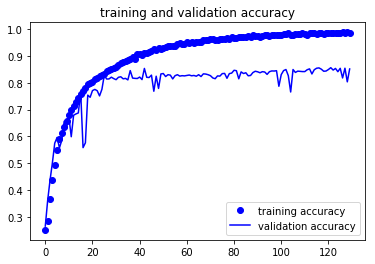

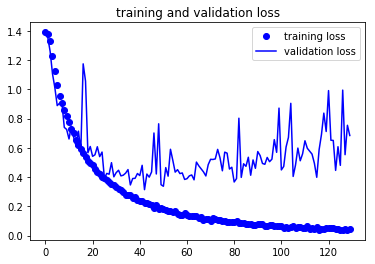

In [108]:
#visualize the training

numberOfEpochs = range( 130 )

accuracyHistory = fromScratchSequentialModelHistory[ 'acc' ]

validationAccuracyHistory = fromScratchSequentialModelHistory[ 'val_acc' ]

lossHistory = fromScratchSequentialModelHistory[ 'loss' ]

validationLossHistory = fromScratchSequentialModelHistory[ 'val_loss' ]

matplotlib.pyplot.plot( numberOfEpochs, accuracyHistory, 'bo', label = 'training accuracy' )

matplotlib.pyplot.plot( numberOfEpochs, validationAccuracyHistory, 'b', label = 'validation accuracy' )

matplotlib.pyplot.title( 'training and validation accuracy' )

matplotlib.pyplot.legend()

matplotlib.pyplot.figure()





matplotlib.pyplot.plot( numberOfEpochs, lossHistory, 'bo', label = 'training loss' )

matplotlib.pyplot.plot( numberOfEpochs, validationLossHistory, 'b', label = 'validation loss' )

matplotlib.pyplot.title( 'training and validation loss' )

matplotlib.pyplot.legend()

matplotlib.pyplot.show()

